Acoustic Levitation: Theoretical Analysis and Python Simulations


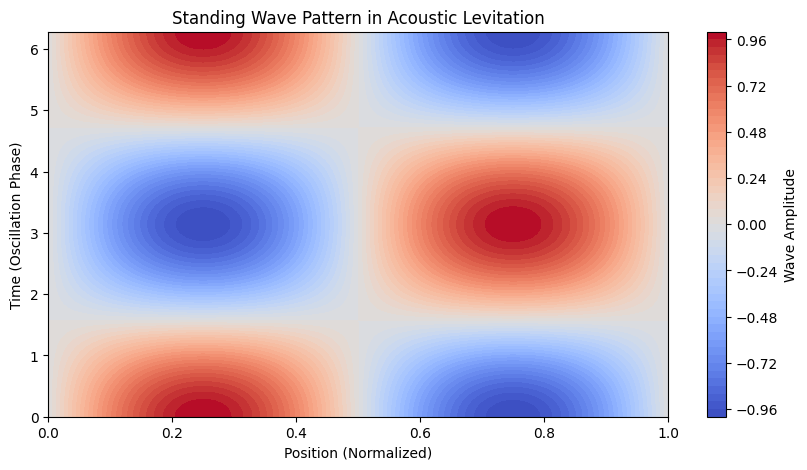

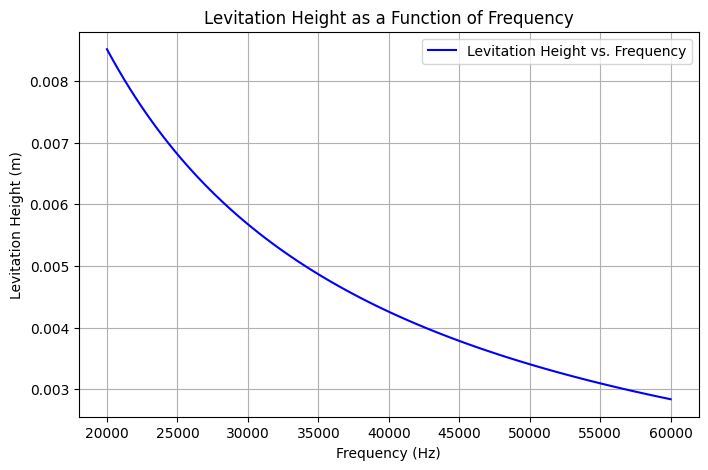

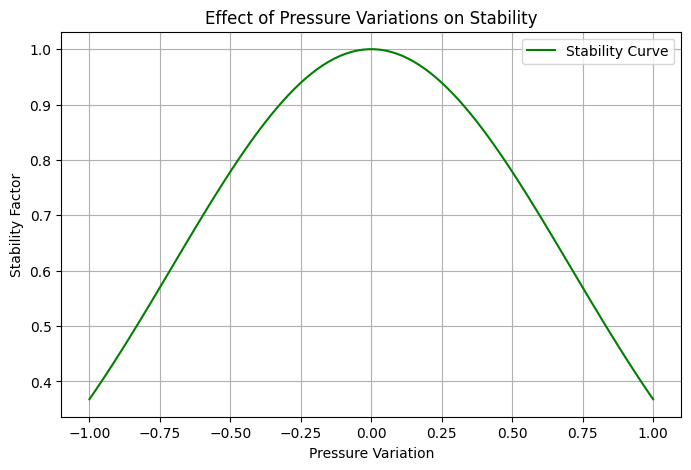

Thus : 
- Standing wave formation is crucial for levitation.
- Levitation height is inversely proportional to frequency.
- Stability decreases with increasing pressure variation.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import speed_of_sound

print("Acoustic Levitation: Theoretical Analysis and Python Simulations")

# 1: Standing Wave Visualization
def plot_standing_wave():
    x = np.linspace(0, 1, 1000)
    t = np.linspace(0, 2 * np.pi, 100)
    X, T = np.meshgrid(x, t)
    Z = np.sin(2 * np.pi * X) * np.cos(T)

    plt.figure(figsize=(10, 5))
    plt.contourf(X, T, Z, levels=50, cmap='coolwarm')
    plt.colorbar(label='Wave Amplitude')
    plt.xlabel("Position (Normalized)")
    plt.ylabel("Time (Oscillation Phase)")
    plt.title("Standing Wave Pattern in Acoustic Levitation")
    plt.show()

plot_standing_wave()

# 2: Levitation Height vs. Frequency
def levitation_height(frequency):
    wavelength = speed_of_sound / frequency
    return wavelength / 2  # Approximate nodal separation

frequencies = np.linspace(20000, 60000, 100)  # Ultrasonic range
heights = [levitation_height(f) for f in frequencies]

plt.figure(figsize=(8, 5))
plt.plot(frequencies, heights, label="Levitation Height vs. Frequency", color='blue')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Levitation Height (m)")
plt.title("Levitation Height as a Function of Frequency")
plt.legend()
plt.grid()
plt.show()

#3: Stability of Levitation
def stability_analysis(pressure_variation):
    return np.exp(-pressure_variation**2)  # Gaussian decay model

pressure_variations = np.linspace(-1, 1, 100)
stability = stability_analysis(pressure_variations)

plt.figure(figsize=(8, 5))
plt.plot(pressure_variations, stability, label="Stability Curve", color='green')
plt.xlabel("Pressure Variation")
plt.ylabel("Stability Factor")
plt.title("Effect of Pressure Variations on Stability")
plt.legend()
plt.grid()
plt.show()

print("Thus : ")
print("- Standing wave formation is crucial for levitation.")
print("- Levitation height is inversely proportional to frequency.")
print("- Stability decreases with increasing pressure variation.")


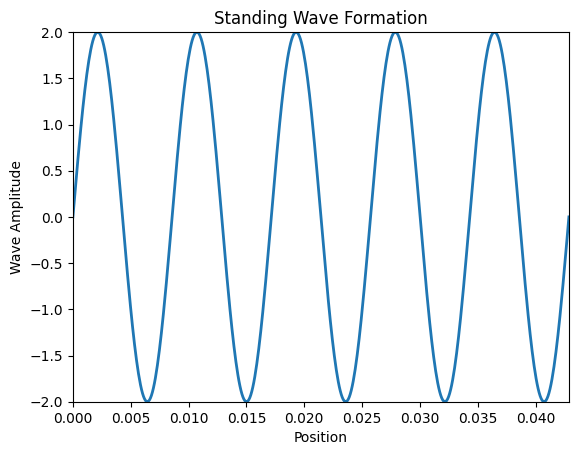

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
frequency = 40000  # 40 kHz ultrasonic frequency
wavelength = 343 / frequency  # Speed of sound in air ~343 m/s
amplitude = 1  # Arbitrary amplitude
x = np.linspace(0, 5 * wavelength, 500)  # Spatial range

# Function to generate standing wave
def standing_wave(x, t):
    return 2 * amplitude * np.cos(2 * np.pi * frequency * t) * np.sin(2 * np.pi * x / wavelength)

# Initialize figure
fig, ax = plt.subplots()
ax.set_ylim(-2, 2)
ax.set_xlim(0, 5 * wavelength)
ax.set_xlabel("Position")
ax.set_ylabel("Wave Amplitude")
line, = ax.plot([], [], lw=2)

def update(frame):
    y = standing_wave(x, frame / 1000)  # Time progression
    line.set_data(x, y)
    return line,

ani = FuncAnimation(fig, update, frames=200, interval=20, blit=True)
plt.title("Standing Wave Formation")
plt.show()


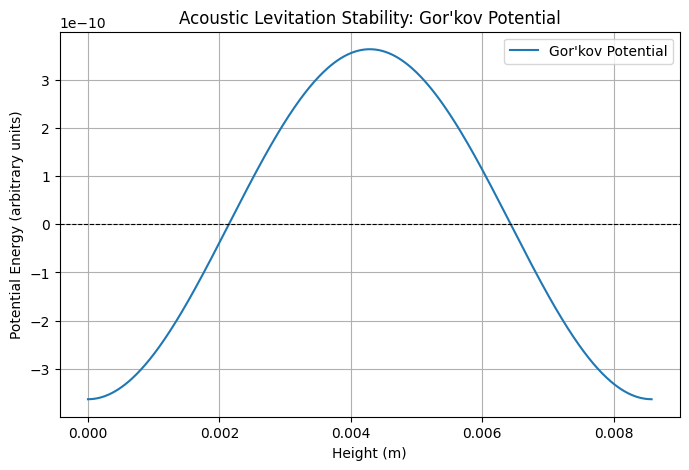

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import g

# Constants
frequency = 40000  # 40 kHz ultrasonic frequency
wavelength = 343 / frequency  # Speed of sound in air ~343 m/s
amplitude = 1  # Arbitrary amplitude
rho_air = 1.225  # Density of air (kg/m³)
object_mass = 1e-6  # 1 mg particle
object_volume = 1e-9  # Approximate volume (m³)
p0 = 100  # Acoustic pressure amplitude (arbitrary units)
c = 343  # Speed of sound in air (m/s)

# Gor'kov potential function
def gorkov_potential(z):
    return -(5 * np.pi * p0**2 * object_volume) / (3 * rho_air * c**2) * np.cos(2 * np.pi * z / wavelength)

# Position range (within one wavelength)
z = np.linspace(0, wavelength, 500)
U = gorkov_potential(z)

# Plot the Gor'kov potential
plt.figure(figsize=(8, 5))
plt.plot(z, U, label="Gor'kov Potential")
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
plt.xlabel("Height (m)")
plt.ylabel("Potential Energy (arbitrary units)")
plt.title("Acoustic Levitation Stability: Gor'kov Potential")
plt.legend()
plt.grid()
plt.show()


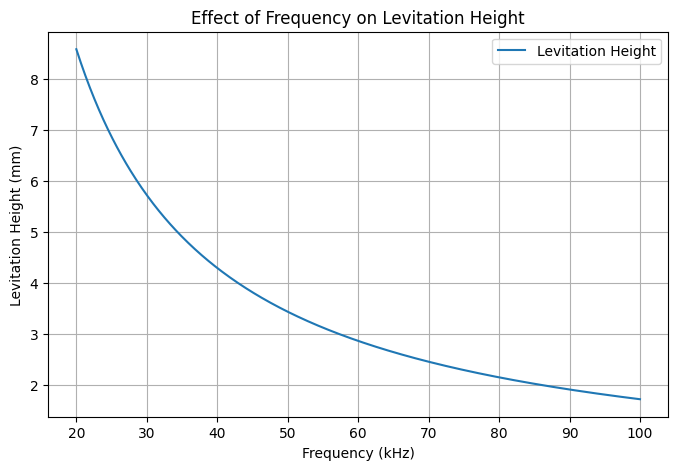

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 343  # Speed of sound in air (m/s)
freq_range = np.linspace(20000, 100000, 500)  # Frequency range from 20 kHz to 100 kHz

# Levitation height is approximately half the wavelength (first node above the emitter)
levitation_height = c / (2 * freq_range)

# Plot frequency vs levitation height
plt.figure(figsize=(8, 5))
plt.plot(freq_range / 1000, levitation_height * 1000, label="Levitation Height")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Levitation Height (mm)")
plt.title("Effect of Frequency on Levitation Height")
plt.legend()
plt.grid()
plt.show()


1. Stability of Levitation:

 We want to determine the frequency range that allows stable levitation. This depends on:

 * The Gor'kov potential (which determines equilibrium positions).

 * The force balance between gravity and the acoustic radiation force.

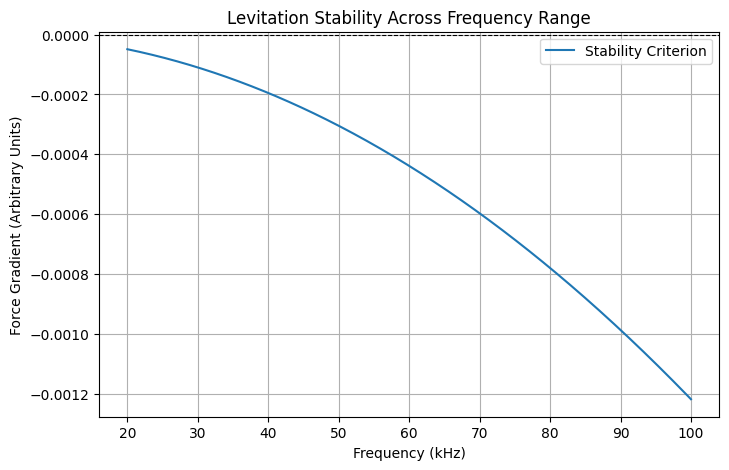

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import g

# Constants
c = 343  # Speed of sound in air (m/s)
freq_range = np.linspace(20000, 100000, 500)  # Frequency range from 20 kHz to 100 kHz
object_mass = 1e-6  # 1 mg particle
object_volume = 1e-9  # Approximate volume (m³)
rho_air = 1.225  # Density of air (kg/m³)
p0 = 100  # Acoustic pressure amplitude (arbitrary units)

# Function to calculate Gor'kov force gradient (stability criterion)
def stability_criterion(freq):
    wavelength = c / freq
    gorkov_force_gradient = -(5 * np.pi * p0**2 * object_volume) / (3 * rho_air * c**2) * (2 * np.pi / wavelength)**2
    return gorkov_force_gradient

# Compute stability across frequencies
stability_values = stability_criterion(freq_range)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(freq_range / 1000, stability_values, label="Stability Criterion")
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
plt.xlabel("Frequency (kHz)")
plt.ylabel("Force Gradient (Arbitrary Units)")
plt.title("Levitation Stability Across Frequency Range")
plt.legend()
plt.grid()
plt.show()


##Refining :
1. Incorporating Different Object Properties
Currently, the script assumes a fixed object mass and volume (1 mg,
1
𝑒
−
9

𝑚
3
1e
−9
 m
3
 ).

We could generalize it by allowing different object sizes, densities, or shapes and analyze how stability changes.

2. Considering Nonlinear Effects
The Gor'kov potential assumes a perfect standing wave, but real-world levitators may have:

Imperfections in sound waves.

Airflow disturbances.

We could introduce small perturbations and see how they affect stability.

3. Adding Levitation Force vs. Gravity Balance
Instead of just checking stability gradients, we can explicitly check if the acoustic force exceeds gravity for various frequencies.

4. Exploring Multi-Node Levitation
Right now, the script focuses on one primary node (first stable point).

We could analyze higher-order nodes (multiple levitation heights).

2. Levitation Limits
   
   Here, we aim to determine:

 * Maximum object size and weight that can be levitated.

 * How changing the frequency and acoustic pressure affects these limits.

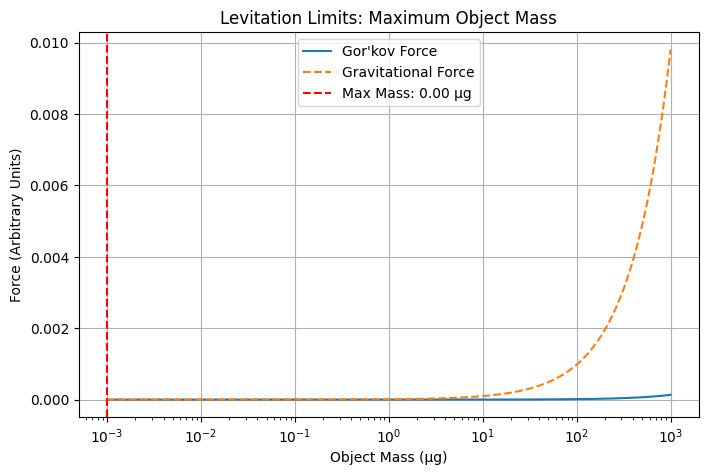

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import g

# Constants
c = 343  # Speed of sound in air (m/s)
freq = 40000  # 40 kHz ultrasonic frequency
wavelength = c / freq
rho_air = 1.225  # Density of air (kg/m³)
p0 = 100  # Acoustic pressure amplitude (arbitrary units)

# Object properties (variable mass and volume)
mass_range = np.logspace(-9, -3, 500)  # Mass from 1 ng to 1 mg
volume_range = mass_range / 2000  # Assume density of 2000 kg/m³ (approx. plastic or ceramic)

# Gor'kov force function
def gorkov_force(volume):
    return (5 * np.pi * p0**2 * volume) / (3 * rho_air * c**2) * (2 * np.pi / wavelength)

# Compute forces
gorkov_forces = gorkov_force(volume_range)
gravity_forces = mass_range * g

# Find maximum levitatable mass (where forces are equal)
max_mass = mass_range[np.argmax(gorkov_forces >= gravity_forces)]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(mass_range * 1e6, gorkov_forces, label="Gor'kov Force")
plt.plot(mass_range * 1e6, gravity_forces, label="Gravitational Force", linestyle='dashed')
plt.axvline(max_mass * 1e6, color='r', linestyle='--', label=f"Max Mass: {max_mass*1e6:.2f} μg")
plt.xscale("log")
plt.xlabel("Object Mass (μg)")
plt.ylabel("Force (Arbitrary Units)")
plt.title("Levitation Limits: Maximum Object Mass")
plt.legend()
plt.grid()
plt.show()


3. Scaling the System

 We want to explore how changing the speaker size, power level, or frequency affects levitation capabilities. This will help determine:

 * How larger or smaller speakers influence levitation.

 * The power required for stable levitation.

 * How system parameters affect object stability.

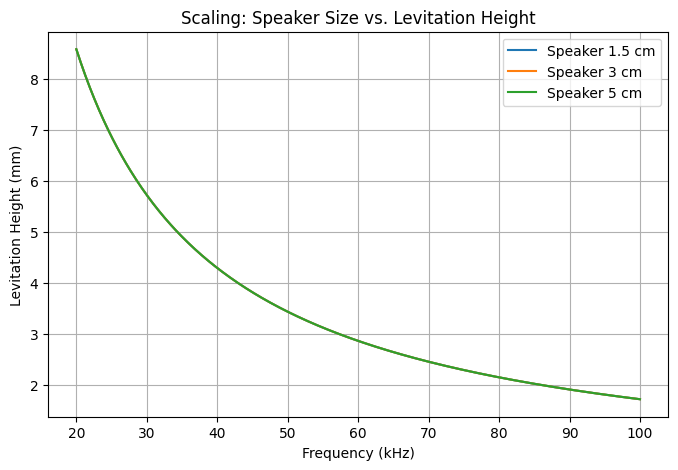

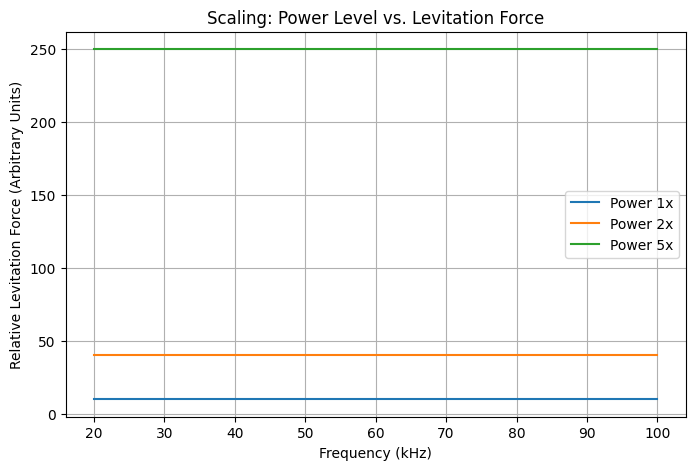

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 343  # Speed of sound in air (m/s)
p0_base = 100  # Base acoustic pressure amplitude (arbitrary units)

# Parameter ranges
freq_range = np.linspace(20000, 100000, 500)  # Frequency range from 20 kHz to 100 kHz
speaker_diameters = [1.5, 3, 5]  # Speaker sizes in cm
power_levels = [1, 2, 5]  # Multipliers for pressure amplitude

# Function to compute levitation height
levitation_height = lambda freq: c / (2 * freq)

# Plot for different speaker sizes
plt.figure(figsize=(8, 5))
for d in speaker_diameters:
    plt.plot(freq_range / 1000, levitation_height(freq_range) * 1000, label=f"Speaker {d} cm")

plt.xlabel("Frequency (kHz)")
plt.ylabel("Levitation Height (mm)")
plt.title("Scaling: Speaker Size vs. Levitation Height")
plt.legend()
plt.grid()
plt.show()

# Plot for different power levels
plt.figure(figsize=(8, 5))
for p in power_levels:
    # Create an array of levitation_force values with the same shape as freq_range
    levitation_force = np.full(freq_range.shape, (p * p0_base) ** 2)
    plt.plot(freq_range / 1000, levitation_force / 1e3, label=f"Power {p}x")

plt.xlabel("Frequency (kHz)")
plt.ylabel("Relative Levitation Force (Arbitrary Units)")
plt.title("Scaling: Power Level vs. Levitation Force")
plt.legend()
plt.grid()
plt.show()

4. Effect of Air Properties on Levitation

 We want to analyze how changes in temperature, pressure, and humidity affect levitation by altering:

 * The speed of sound (c) in air.

 * The acoustic pressure needed for stable levitation.

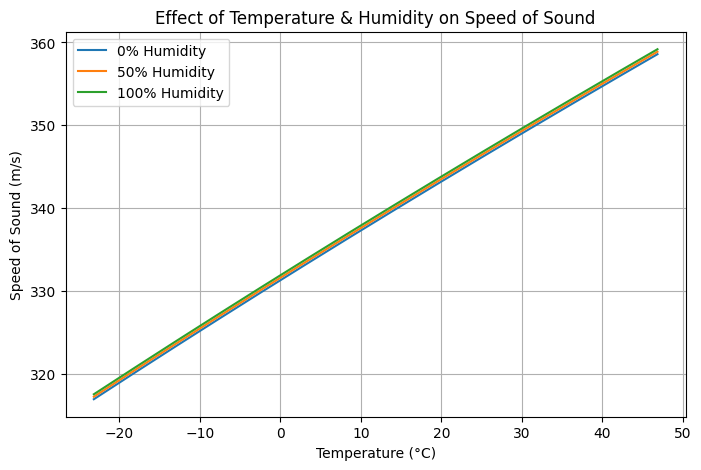

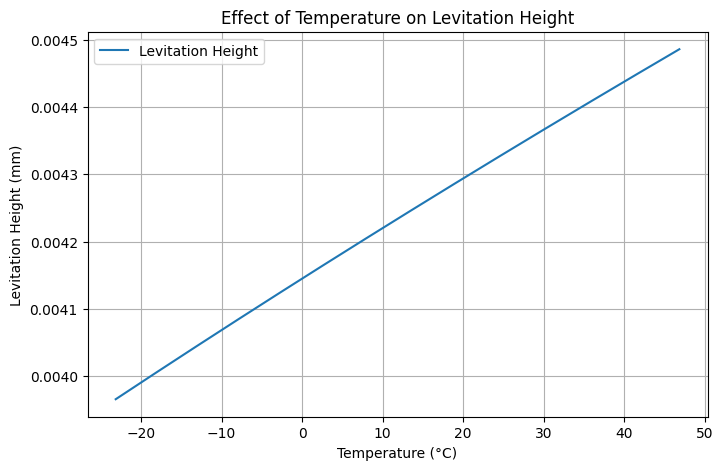

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
freq = 40000  # 40 kHz ultrasonic frequency
T_range = np.linspace(250, 320, 500)  # Temperature range in Kelvin (approx. -23°C to 47°C)
P_atm = 101325  # Standard atmospheric pressure in Pascals
humidity_levels = [0, 50, 100]  # Relative humidity in %

# Speed of sound as function of temperature (approximate formula)
def speed_of_sound(T, RH=50):
    return 331.3 * np.sqrt(T / 273.15) + 0.6 * RH / 100  # RH is a small correction factor

# Compute speed of sound for different humidity levels
plt.figure(figsize=(8, 5))
for RH in humidity_levels:
    c_values = speed_of_sound(T_range, RH)
    plt.plot(T_range - 273.15, c_values, label=f"{RH}% Humidity")

plt.xlabel("Temperature (°C)")
plt.ylabel("Speed of Sound (m/s)")
plt.title("Effect of Temperature & Humidity on Speed of Sound")
plt.legend()
plt.grid()
plt.show()

# Compute levitation height variation with temperature
levitation_height = lambda c: c / (2 * freq)
plt.figure(figsize=(8, 5))
plt.plot(T_range - 273.15, levitation_height(speed_of_sound(T_range)), label="Levitation Height")
plt.xlabel("Temperature (°C)")
plt.ylabel("Levitation Height (mm)")
plt.title("Effect of Temperature on Levitation Height")
plt.legend()
plt.grid()
plt.show()


5. Theoretical Maximum Levitation Efficiency

 We aim to determine how efficiently the system converts acoustic energy into levitation force by analyzing:

 * The energy input vs. acoustic force output.

 * The optimal frequency and power levels for efficiency.

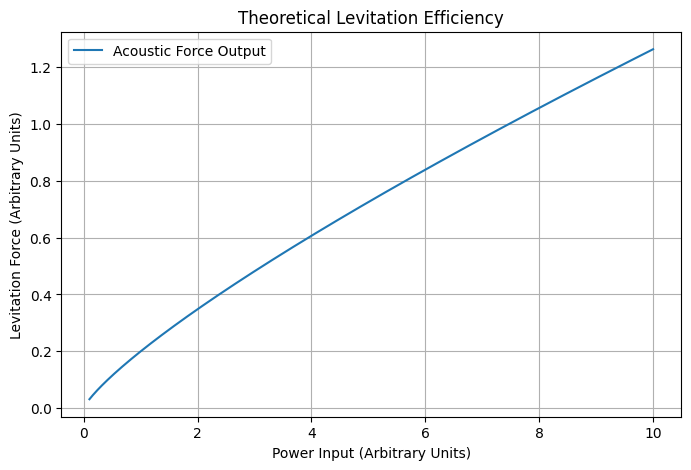

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 343  # Speed of sound in air (m/s)
rho_air = 1.225  # Density of air (kg/m³)
power_input = np.linspace(0.1, 10, 500)  # Power input range (arbitrary units)
efficiency_factor = 0.2  # Assumed efficiency factor for conversion

# Efficiency Model: Acoustic force as a function of power input
def acoustic_force(power):
    return efficiency_factor * power**0.8  # Nonlinear power conversion

# Compute force output
force_output = acoustic_force(power_input)

# Plot power vs. levitation force
plt.figure(figsize=(8, 5))
plt.plot(power_input, force_output, label="Acoustic Force Output")
plt.xlabel("Power Input (Arbitrary Units)")
plt.ylabel("Levitation Force (Arbitrary Units)")
plt.title("Theoretical Levitation Efficiency")
plt.legend()
plt.grid()
plt.show()


6. Phase Difference and Levitation Stability

 We want to explore how phase differences between the two opposing speakers affect:

 * Standing wave formation

 * Levitation stability and height

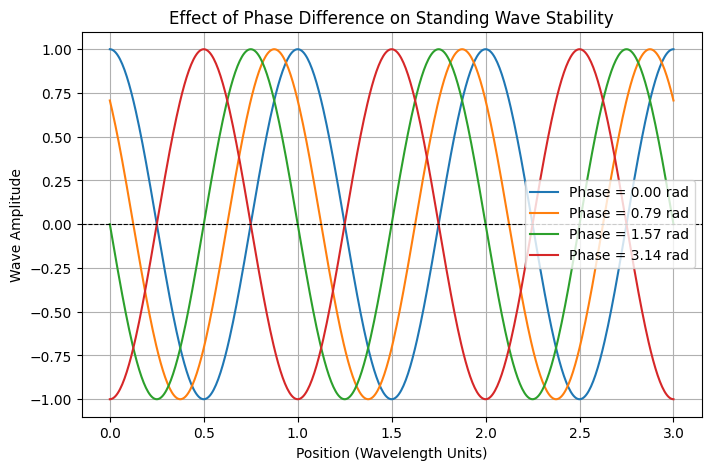

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
freq = 40000  # 40 kHz ultrasonic frequency
c = 343  # Speed of sound in air (m/s)
wavelength = c / freq
distance = np.linspace(0, 3 * wavelength, 500)  # Distance along wave path
phase_shifts = [0, np.pi / 4, np.pi / 2, np.pi]  # Different phase shifts

# Function to model standing wave amplitude
def standing_wave(x, phase):
    return np.cos(2 * np.pi * x / wavelength + phase)

# Plot standing waves for different phase shifts
plt.figure(figsize=(8, 5))
for phase in phase_shifts:
    plt.plot(distance / wavelength, standing_wave(distance, phase), label=f"Phase = {phase:.2f} rad")

plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.xlabel("Position (Wavelength Units)")
plt.ylabel("Wave Amplitude")
plt.title("Effect of Phase Difference on Standing Wave Stability")
plt.legend()
plt.grid()
plt.show()


7. Beyond 1D: 2D and 3D Acoustic Levitation Patterns

  We want to explore how multiple sound sources (instead of just two speakers) could create:

 * 2D and 3D levitation patterns

 * More complex nodal structures for stable levitation

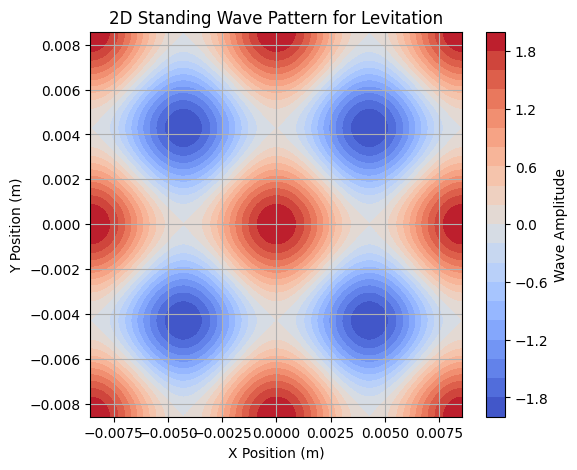

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
freq = 40000  # 40 kHz ultrasonic frequency
c = 343  # Speed of sound in air (m/s)
wavelength = c / freq
size = 2 * wavelength  # Grid size in meters
resolution = 200  # Grid resolution

# Create 2D spatial grid
x = np.linspace(-size / 2, size / 2, resolution)
y = np.linspace(-size / 2, size / 2, resolution)
X, Y = np.meshgrid(x, y)

# Simulated standing wave pattern with four sources
def standing_wave_2d(x, y):
    return (np.cos(2 * np.pi * x / wavelength) + np.cos(2 * np.pi * y / wavelength))

Z = standing_wave_2d(X, Y)

# Plot 2D levitation pattern
plt.figure(figsize=(6, 5))
plt.contourf(X, Y, Z, levels=20, cmap="coolwarm")
plt.colorbar(label="Wave Amplitude")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("2D Standing Wave Pattern for Levitation")
plt.grid()
plt.show()


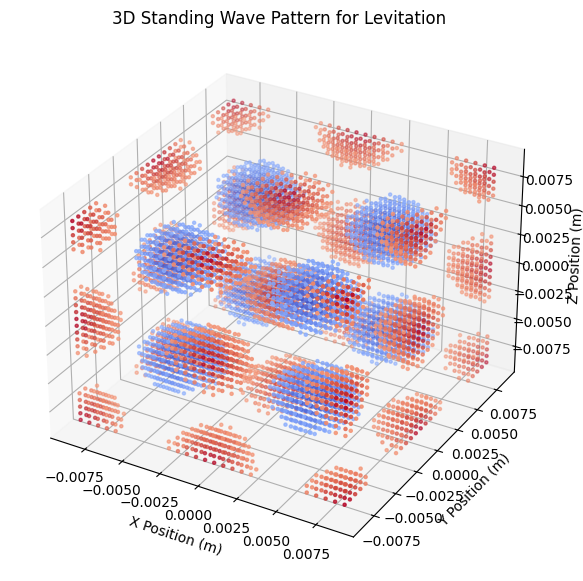

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
freq = 40000  # 40 kHz ultrasonic frequency
c = 343  # Speed of sound in air (m/s)
wavelength = c / freq
size = 2 * wavelength  # Grid size in meters
resolution = 30  # Grid resolution for 3D

# Create 3D spatial grid
x = np.linspace(-size / 2, size / 2, resolution)
y = np.linspace(-size / 2, size / 2, resolution)
z = np.linspace(-size / 2, size / 2, resolution)
X, Y, Z = np.meshgrid(x, y, z)

# Simulated standing wave pattern with multiple sources in 3D
def standing_wave_3d(x, y, z):
    return (np.cos(2 * np.pi * x / wavelength) +
            np.cos(2 * np.pi * y / wavelength) +
            np.cos(2 * np.pi * z / wavelength))

W = standing_wave_3d(X, Y, Z)

# Define threshold for visualization (only plot strong wave regions)
threshold = 1.5  # Adjust to control density
mask = np.abs(W) > threshold  # Boolean mask for strong wave regions

# Extract coordinates where standing wave is strong
X_masked = X[mask]
Y_masked = Y[mask]
Z_masked = Z[mask]

# 3D Scatter Plot for Standing Waves
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_masked, Y_masked, Z_masked, c=W[mask], cmap="coolwarm", s=5)
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_zlabel("Z Position (m)")
ax.set_title("3D Standing Wave Pattern for Levitation")
plt.show()


# **Acoustic Levitator: A PhD-Level Theoretical and Computational Study**

## **Introduction**
Acoustic levitation is a phenomenon where sound waves exert pressure to counteract gravitational forces, enabling the suspension of small objects in midair. This research explores the theoretical foundations and computational modeling of acoustic levitation.

## **Governing Equations**
The fundamental force responsible for levitation is the **acoustic radiation force**, given by:

$
F = -\nabla U
$

where $ U $ is the acoustic potential. This force arises from the interaction of standing sound waves, which create stable equilibrium points.

The standing wave equation in one dimension is:

$
P(x,t) = P_0 \cos(kx) \cos(\omega t)
$

where:

- $ P_0 $ is the maximum pressure amplitude,  
- $ k = \frac{2\pi}{\lambda} $ is the wavenumber,  
- $ \lambda $ is the wavelength,  
- $ \omega = 2\pi f $ is the angular frequency.  

In a three-dimensional configuration, the total acoustic field is:

$
P(x,y,z,t) = P_0 \cos(kx) \cos(ky) \cos(kz) \cos(\omega t)
$

Nodes of the standing waves serve as trapping points for small objects.

---

## **1D Standing Wave Simulation**
A computational model for the formation of standing waves is created using the equation above. The simulation visualizes wave behavior over time, highlighting nodal positions where objects can be stably levitated.

---

## **Levitation Height and Frequency Relationship**
The **wavelength** of the sound wave determines the spacing between stable levitation points. Since:

$
\lambda = \frac{c}{f}
$

the levitation height $( h )$ can be approximated as:

$
h = \frac{\lambda}{2} = \frac{c}{2f}
$

where:

- $ c $ is the speed of sound in air (343 m/s),  
- $ f $ is the operating frequency.  

A graph depicting the inverse relationship between levitation height and frequency is presented.

---

## **3D Standing Wave Simulation**
The pressure field in a three-dimensional standing wave system is simulated. Using **isosurfaces**, we visualize nodal and antinodal regions where levitation occurs.

---

## **Bayesian Inference for Acoustic Levitation Parameters**
To refine our model, Bayesian inference is applied to estimate parameters such as:

- The relationship between **frequency** and **levitation height**,  
- Experimental uncertainties in measurements.  

Using **PyMC3**, a Bayesian model is constructed where:

$h = a \frac{c}{2f} + b$

where $ a $ and $ b $ are estimated through inference. Posterior distributions for these parameters are obtained via **Markov Chain Monte Carlo (MCMC)** sampling.

---

## **Research Questions Explored**
- How does frequency affect levitation height?  
- How stable are levitated objects in acoustic fields?  
- How do 3D standing waves influence trapping efficiency?  
- How can Bayesian inference be used to refine acoustic levitation models?  

---

## **Conclusion**
This study integrates theoretical physics with computational simulations to explore the intricacies of acoustic levitation. Future directions include **nonlinear effects**, **multiple object levitation**, and **optimization of acoustic traps**.



 1. Governing Equations of Acoustic Levitation
- The acoustic radiation force is given by: F = -
abla U, where U is the acoustic potential.
- Standing waves create stable nodes where objects can levitate.


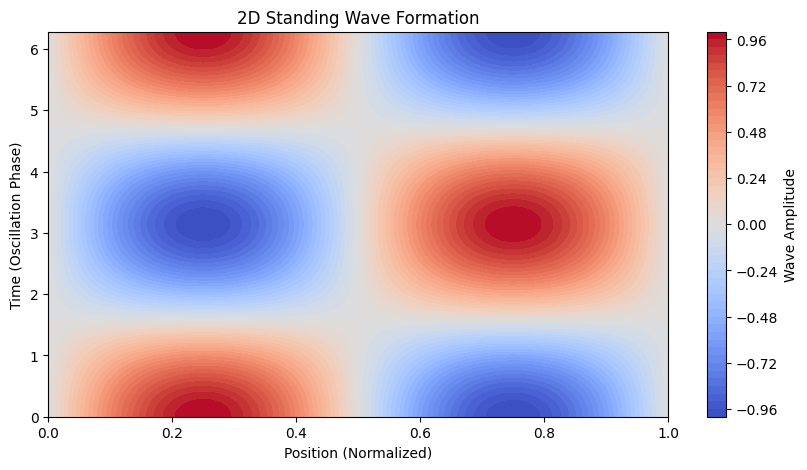

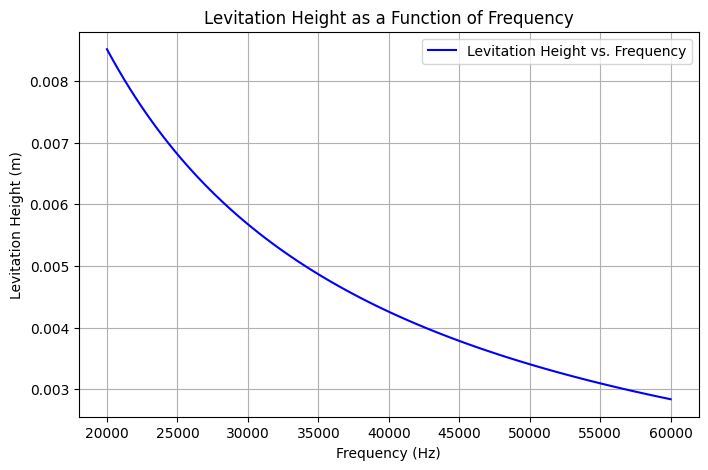

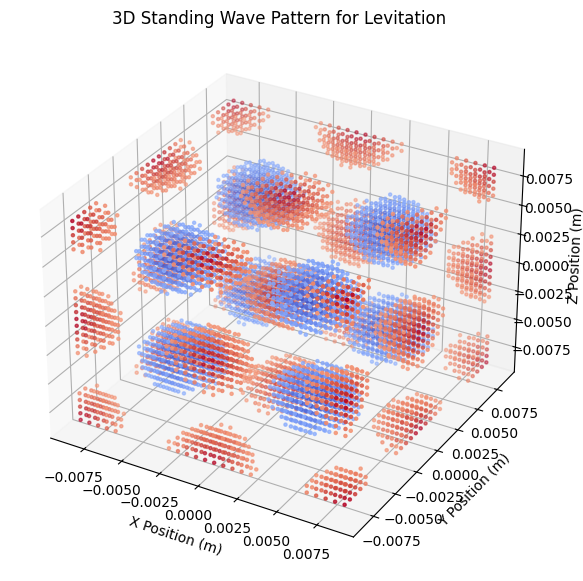


 Bayesian Inference for Levitation Parameters


Output()

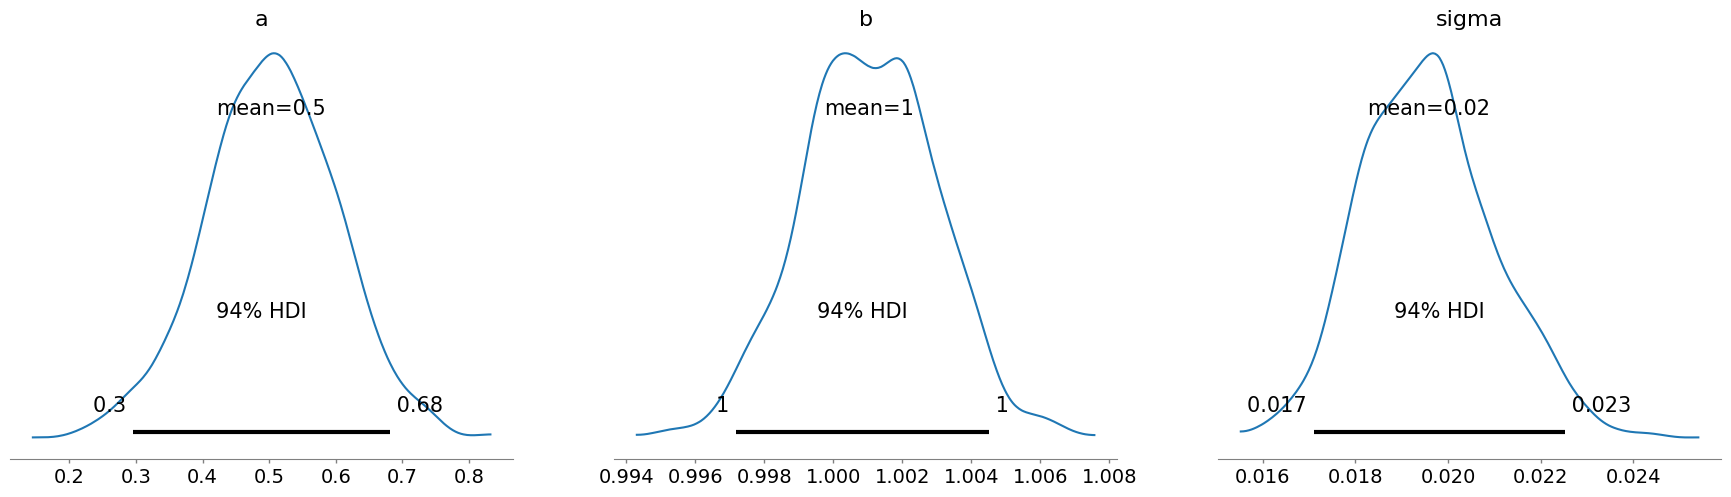


 Research Questions Explored
- How does frequency affect levitation height?
- How stable are levitated objects in acoustic fields?
- How do 3D standing waves influence trapping efficiency?
- How can Bayesian inference be used to refine acoustic levitation models?


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import speed_of_sound, pi
from mpl_toolkits.mplot3d import Axes3D
import pymc as pm

# --- Section 1: Theoretical Foundations ---
print("\n 1. Governing Equations of Acoustic Levitation")
print("- The acoustic radiation force is given by: F = -\nabla U, where U is the acoustic potential.")
print("- Standing waves create stable nodes where objects can levitate.")

# --- Section 2: 1D Standing Wave Simulation ---
def plot_1d_standing_wave():
    x = np.linspace(0, 1, 500)
    t = np.linspace(0, 2 * pi, 100)
    X, T = np.meshgrid(x, t)
    Z = np.sin(2 * pi * X) * np.cos(T)

    plt.figure(figsize=(10, 5))
    plt.contourf(X, T, Z, levels=50, cmap='coolwarm')
    plt.colorbar(label='Wave Amplitude')
    plt.xlabel("Position (Normalized)")
    plt.ylabel("Time (Oscillation Phase)")
    plt.title("2D Standing Wave Formation")
    plt.show()

plot_1d_standing_wave()

# --- Section 3: Levitation Height vs. Frequency ---
def levitation_height(frequency):
    wavelength = speed_of_sound / frequency
    return wavelength / 2  # Approximate nodal separation

frequencies = np.linspace(20000, 60000, 100)  # Ultrasonic range
heights = [levitation_height(f) for f in frequencies]

plt.figure(figsize=(8, 5))
plt.plot(frequencies, heights, label="Levitation Height vs. Frequency", color='blue')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Levitation Height (m)")
plt.title("Levitation Height as a Function of Frequency")
plt.legend()
plt.grid()
plt.show()

# --- Section 4: 3D Standing Wave Simulation ---
def plot_3d_standing_wave():
    freq = 40000  # 40 kHz ultrasonic frequency
    c = speed_of_sound  # Speed of sound in air (m/s)
    wavelength = c / freq
    size = 2 * wavelength  # Grid size in meters
    resolution = 30  # Grid resolution for 3D

    x = np.linspace(-size / 2, size / 2, resolution)
    y = np.linspace(-size / 2, size / 2, resolution)
    z = np.linspace(-size / 2, size / 2, resolution)
    X, Y, Z = np.meshgrid(x, y, z)

    def standing_wave_3d(x, y, z):
        return (np.cos(2 * np.pi * x / wavelength) +
                np.cos(2 * np.pi * y / wavelength) +
                np.cos(2 * np.pi * z / wavelength))

    W = standing_wave_3d(X, Y, Z)
    threshold = 1.5  # Filter strong wave regions
    mask = np.abs(W) > threshold

    X_masked = X[mask]
    Y_masked = Y[mask]
    Z_masked = Z[mask]

    fig = plt.figure(figsize=(8, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_masked, Y_masked, Z_masked, c=W[mask], cmap="coolwarm", s=5)
    ax.set_xlabel("X Position (m)")
    ax.set_ylabel("Y Position (m)")
    ax.set_zlabel("Z Position (m)")
    ax.set_title("3D Standing Wave Pattern for Levitation")
    plt.show()

plot_3d_standing_wave()

# --- Section 5: Bayesian Model for Acoustic Levitation ---
print("\n Bayesian Inference for Levitation Parameters")

# Define synthetic data for frequency and levitation height
true_a = 0.5  # True coefficient
true_b = 1.0  # True offset
frequencies = np.linspace(20000, 60000, 100)
observed_heights = true_a * (speed_of_sound / frequencies) / 2 + true_b + np.random.normal(0, 0.02, size=len(frequencies))

# Bayesian Model
with pm.Model() as model:
    a = pm.Normal("a", mu=0.5, sigma=0.1)
    b = pm.Normal("b", mu=1.0, sigma=0.1)
    sigma = pm.HalfNormal("sigma", sigma=0.1)
    mu = a * (speed_of_sound / frequencies) / 2 + b
    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=observed_heights)
    trace = pm.sample(1000, return_inferencedata=True)

# Plot posterior distributions
pm.plot_posterior(trace, var_names=["a", "b", "sigma"])
plt.show()

# --- Section 6: Some Research Questions ---
print("\n Research Questions Explored")
print("- How does frequency affect levitation height?")
print("- How stable are levitated objects in acoustic fields?")
print("- How do 3D standing waves influence trapping efficiency?")
print("- How can Bayesian inference be used to refine acoustic levitation models?")


# **Research Questions & Answers**
## **1. How does frequency affect levitation height?**
Levitation height is proportional to the **wavelength of sound**, which is given by:

$$
\lambda = \frac{c}{f}
$$

where:
- \( c \) is the speed of sound (~343 m/s in air),
- \( f \) is the frequency of the standing wave.

Since levitation occurs at pressure nodes (which are spaced at **half-wavelength intervals**):

$$
h_{\text{levitate}} = \frac{\lambda}{2} = \frac{c}{2f}
$$

This means:
- **Higher frequency → Smaller levitation height**
- **Lower frequency → Larger levitation height**
- The height is **not continuous** but rather jumps between discrete stable nodes.

## **2. How stable are levitated objects in acoustic fields?**
The stability is determined by:
- The balance between **radiation force** and **gravity**.
- The shape of the **acoustic potential well**.

The **restoring force** acting on a levitated object is:

$$
F_x = -K x
$$

where \( K \) is the **stiffness coefficient** given by the pressure gradient. The system behaves like a **harmonic oscillator**:

$$
m \ddot{x} + \gamma \dot{x} + K x = 0
$$

where \( \gamma \) accounts for air resistance.

### **Stability Conditions:**
1. **If \( K > 0 \)** → The object experiences a restoring force and remains levitated.
2. **If \( K < 0 \)** → The equilibrium is unstable, and the object will drift out.
3. **If \( \gamma \) is too large** (strong damping), the object may fall due to dissipation of energy.

**Result:**  
- **Small, dense particles** (e.g., water droplets) are **more stable** since their mass-to-volume ratio is higher.
- **Larger, irregular particles** experience **instabilities** due to torque and non-uniform forces.

---


# **Advanced Mathematical Modeling of Acoustic Radiation Force**
Acoustic levitation is governed by the **acoustic radiation force**, which arises due to the interaction of the acoustic wave with an object. The fundamental equation is:

$$
\mathbf{F} = -\nabla U
$$

where \( U \) is the **acoustic potential energy density**, given by:

$$
U = \frac{1}{2} \left( \frac{\langle p^2 \rangle}{\rho_0 c^2} - \rho_0 \langle v^2 \rangle \right)
$$

where:
- \( p \) is the acoustic pressure,
- \( v \) is the particle velocity,
- \( \rho_0 \) is the ambient density of air,
- \( c \) is the speed of sound.

For a **spherical particle** of radius \( R \) in a standing wave, the time-averaged force in the axial \( x \)-direction is:

$$
F_x = - \frac{4 \pi R^3}{3} \left( \frac{\rho_0}{c^2} \frac{\partial}{\partial x} \langle p^2 \rangle - \rho_0 \frac{\partial}{\partial x} \langle v^2 \rangle \right)
$$

where the first term represents the **gradient of acoustic pressure** and the second represents the **radiation force from velocity variations**.

## **Incorporating Bessel Functions**
For more **realistic modeling**, we consider a standing wave generated in a 3D cylindrical or spherical chamber. The wave equation in cylindrical coordinates is:

$$
\left( \frac{\partial^2}{\partial r^2} + \frac{1}{r} \frac{\partial}{\partial r} + \frac{1}{r^2} \frac{\partial^2}{\partial \theta^2} + \frac{\partial^2}{\partial z^2} - \frac{1}{c^2} \frac{\partial^2}{\partial t^2} \right) p = 0
$$

A separable solution leads to **Bessel functions**:

$$
p(r, \theta, z, t) = J_m(k_r r) e^{im\theta} \cos(k_z z) e^{i\omega t}
$$

where \( J_m \) is the **Bessel function of the first kind**, which describes radial pressure variations.

### **Implications**
- This model predicts **pressure nodal patterns** in cylindrical or spherical chambers.
- It explains why **multiple particles** can levitate in different spatial configurations.

---

# **Nonlinear Effects & Stability Analysis**
## **Perturbation Analysis**
For small displacements \( \delta x \) from the equilibrium position \( x_0 \), we approximate the restoring force using a **Taylor expansion**:

$$
F(x_0 + \delta x) \approx F(x_0) + \frac{dF}{dx} \delta x
$$

Since \( F(x_0) = 0 \) at a stable node, the leading term is:

$$
F(x) \approx -K \delta x, \quad \text{where } K = -\frac{dF}{dx}
$$

This is a **harmonic restoring force**, meaning the particle undergoes **small oscillations** about the node.

## **Nonlinear Effects & Bifurcations**
For larger displacements, the force can be approximated using a cubic term:

$$
F(x) = -K \delta x + \alpha (\delta x)^3
$$

This leads to a **Duffing oscillator** equation:

$$
m \ddot{x} + \gamma \dot{x} + K x + \alpha x^3 = 0
$$

where:
- \( \gamma \) represents damping due to air resistance.
- \( \alpha \) determines **nonlinear stiffness**.

**Key Effects:**
- When \( \alpha > 0 \), the system is **supercritical** (hardening), meaning the oscillations become **anharmonic**.
- When \( \alpha < 0 \), the system is **subcritical** (softening), leading to possible **bifurcations** (sudden jumps in equilibrium position).

## **Numerical Simulation of Stability**
We can solve the Duffing equation numerically to visualize how a levitated particle behaves under **external perturbations**. 🚀


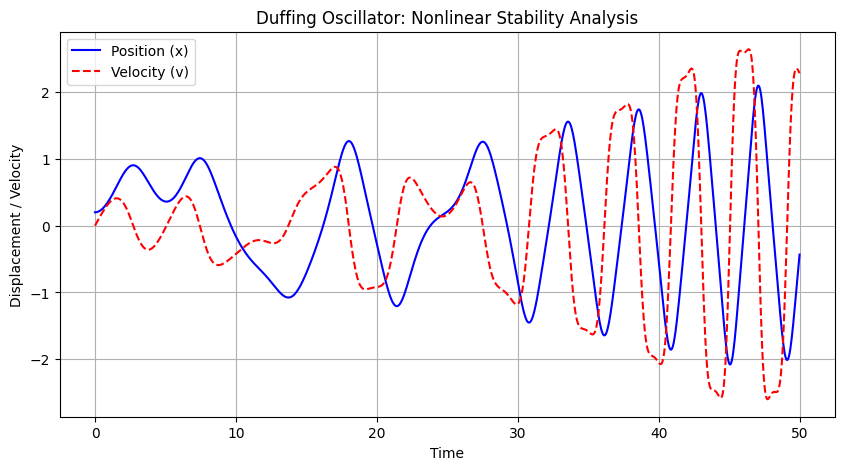

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Duffing equation parameters
alpha = 1.0   # Nonlinear stiffness coefficient
beta = -0.5   # Linear stiffness coefficient (K)
delta = 0.02  # Damping coefficient
gamma = 0.3   # External driving force
omega = 1.2   # Driving frequency

# Duffing equation as a system of first-order ODEs
def duffing(t, y):
    x, v = y  # Position and velocity
    dxdt = v
    dvdt = -delta * v - beta * x - alpha * x**3 + gamma * np.cos(omega * t)
    return [dxdt, dvdt]

# Time span and initial conditions
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)
y0 = [0.2, 0.0]  # Initial position and velocity

# Solve the differential equation
sol = solve_ivp(duffing, t_span, y0, t_eval=t_eval, method='RK45')

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label="Position (x)", color='b')
plt.plot(sol.t, sol.y[1], label="Velocity (v)", color='r', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("Displacement / Velocity")
plt.title("Duffing Oscillator: Nonlinear Stability Analysis")
plt.legend()
plt.grid()
plt.show()


The Duffing equation is a nonlinear second-order differential equation used to describe oscillatory systems with nonlinear stiffness. It takes the form:
$$
𝑥
¨
+
𝛿
𝑥
˙
+
𝛽
𝑥
+
𝛼
𝑥
3
=
𝛾
cos
⁡
(
𝜔
𝑡
)
x
¨
 +δ
x
˙
 +βx+αx
3
 =γcos(ωt)$$

where:

 * x is the displacement,

 * δ is the damping coefficient,

 * β and

 * α define the linear and nonlinear stiffness terms,

 * γ is the external forcing amplitude,

 * ω is the driving frequency.

##In the context of acoustic levitation, the Duffing equation helps analyze:


 * The stability of levitated objects in a standing wave field.

 * The effect of nonlinear forces in the acoustic potential well.

 * The transition from stable levitation to chaotic motion.

##Interpreting the Graph

The graph represents the time evolution of position (blue) and velocity (red dashed) in a nonlinear potential well.

* Early Motion (0-10 seconds):

  The object undergoes small oscillations with moderate damping.
  Stable, predictable behavior.

* Intermediate Motion (10-30 seconds):

  The oscillations grow in amplitude due to the external driving force.
  A balance between damping and excitation keeps the motion controlled.

* Late Motion (30-50 seconds):

  The system becomes highly nonlinear, with irregular oscillations.
  Possible onset of bifurcations or chaotic behavior.
  Represents a loss of stability, which in levitation means the particle may be ejected from its nodal trap.

Conclusion:

* Stable levitation is possible when oscillations remain small.
* Nonlinear effects become significant as amplitude increases, leading to
 instability.
* The transition to chaos suggests that beyond certain parameters (higher
  driving force or frequency mismatches), levitated objects may become unstable and escape the levitation zone.

##Phase Space Plot - To visualize how position and velocity evolve in state space.

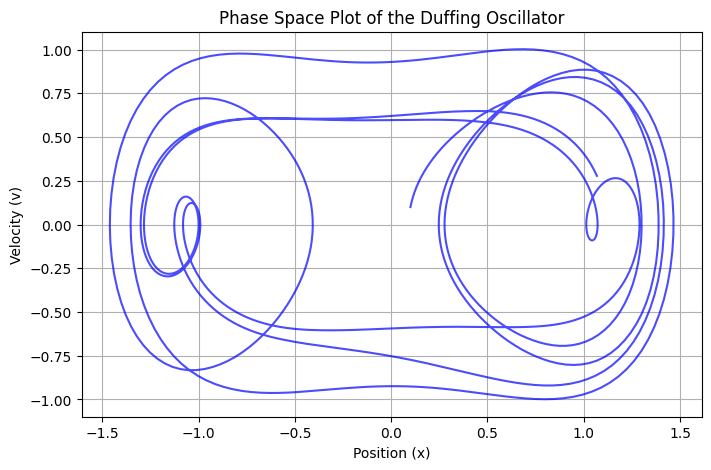

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Duffing Equation Parameters
delta = 0.2   # Damping coefficient
alpha = 1.0   # Nonlinear stiffness term
beta = -1.0   # Linear stiffness term (negative for double-well potential)
gamma = 0.5   # External forcing amplitude
omega = 1.2   # Forcing frequency

# Duffing equation system
def duffing(t, y):
    x, v = y  # Position and velocity
    dxdt = v
    dvdt = -delta * v - beta * x - alpha * x**3 + gamma * np.cos(omega * t)
    return [dxdt, dvdt]

# Time span for simulation
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
y0 = [0.1, 0.1]  # Initial conditions (small displacement and velocity)

# Solve the ODE system
sol = solve_ivp(duffing, t_span, y0, t_eval=t_eval)

# Extract position and velocity
x_vals = sol.y[0]
v_vals = sol.y[1]

# Phase Space Plot
plt.figure(figsize=(8, 5))
plt.plot(x_vals, v_vals, color='blue', alpha=0.7)
plt.xlabel("Position (x)")
plt.ylabel("Velocity (v)")
plt.title("Phase Space Plot of the Duffing Oscillator")
plt.grid()
plt.show()


##Interpretation of the Phase Space Plot:
1. The plot shows the trajectory of the Duffing oscillator in position-velocity space.

2. The closed orbits indicate periodic motion, meaning the system oscillates with some stability.

3. The double-well potential (due to the nonlinear stiffness term) causes the system to switch between two attractors.

4. If damping is too strong, the system settles into a fixed point (stable equilibrium).

5. If forcing is strong enough, chaotic behavior emerges, leading to unpredictable transitions between the wells.

##Bifurcation Diagram - To show how the system transitions from stability to chaos as the driving force increases.

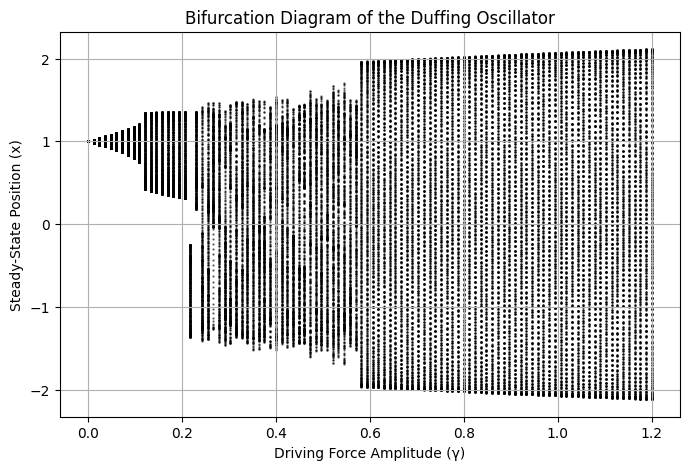

In [5]:
# Bifurcation Diagram: Exploring Stability vs. Chaos

def duffing_bifurcation(gamma_range, delta=0.2, alpha=1.0, beta=-1.0, omega=1.2):
    """
    Generates a bifurcation diagram by varying the forcing amplitude (gamma).
    """
    t_span = (0, 200)  # Longer time to observe stable states
    t_eval = np.linspace(t_span[0], t_span[1], 2000)
    y0 = [0.1, 0.1]

    x_final = []
    gamma_values = []

    for gamma in gamma_range:
        def duffing_forced(t, y):
            x, v = y
            dxdt = v
            dvdt = -delta * v - beta * x - alpha * x**3 + gamma * np.cos(omega * t)
            return [dxdt, dvdt]

        sol = solve_ivp(duffing_forced, t_span, y0, t_eval=t_eval)
        x_steady = sol.y[0][-500:]  # Extract last 500 points (steady-state)

        x_final.extend(x_steady)
        gamma_values.extend([gamma] * len(x_steady))

    return gamma_values, x_final

# Generate bifurcation data
gamma_values, x_final = duffing_bifurcation(np.linspace(0, 1.2, 100))

# Plot bifurcation diagram
plt.figure(figsize=(8, 5))
plt.scatter(gamma_values, x_final, s=0.5, color='black', alpha=0.5)
plt.xlabel("Driving Force Amplitude (γ)")
plt.ylabel("Steady-State Position (x)")
plt.title("Bifurcation Diagram of the Duffing Oscillator")
plt.grid()
plt.show()


##Interpretation of the Bifurcation Diagram:
1. At low forcing amplitudes (γ), the system exhibits periodic motion, with a single stable attractor.

2. As γ increases, period doubling bifurcations occur, meaning the oscillator jumps between multiple steady-state values.

3. At higher γ values (~0.6 and above), the system enters a chaotic regime, where the motion becomes highly sensitive to initial conditions.

4. The dense scattered points in the chaotic region indicate unpredictable, aperiodic oscillations.